In [1]:
from operator import itemgetter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 17 ta ustun haqida ma'lumot:
**Invoic Id** - Joriy sotuv idsi (kompyuter generatsiya qilgan raqam)

**Branch** - Fillial (A,B yoki C)

**City** - Joylashgan shahar

**Customer type** - Mijoz turui; 

**Member**(Maxsus klent - karta ochtirgan), 

**Normal** - Oddiy klent

**Gender**- Jinsi

**Product line**- Sotib olingan mahsulot qaysi bo'limga tegishli:  

**Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel**

**Unit price** - Bir birlik mahsulot narxi

**Quantity** - Sotib olingan mahsulot soni

**Tax** - 5% li Soliq

**Total** - Soliqni qo'shgan holda  hisoblangan ummiy narx

**Date**- Sana

**Time** - Vaqt

**Payment** - To'lov turi (Cash-naqd, Credit-kredit karta, Ewallet-elektron hamyon)

**COGS** - Tannarxi

**Gross margin percentage** = (Jami daromad – sotilgan mahsulot tannarxi)/Jami 
daromad x 100

**Gross income** - yalpi daromad;

**rating**- Reyting

In [21]:
df = pd.read_csv("/content/sotuvlar.csv", sep=",")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [22]:
#Conver Date to datetime
pd.to_datetime(df['Date'])

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [23]:
pd.to_datetime(df['Date']).dt.day
pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,25,3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,25,2
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,24,2
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,10,1
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,20,2


In [24]:
#Conver Time to datetime
df['Time']
pd.to_datetime(df['Time']).dt.hour
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,10
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,25,3,18
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,25,2,14
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,24,2,11
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,10,1,17
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,20,2,13


# Visualization

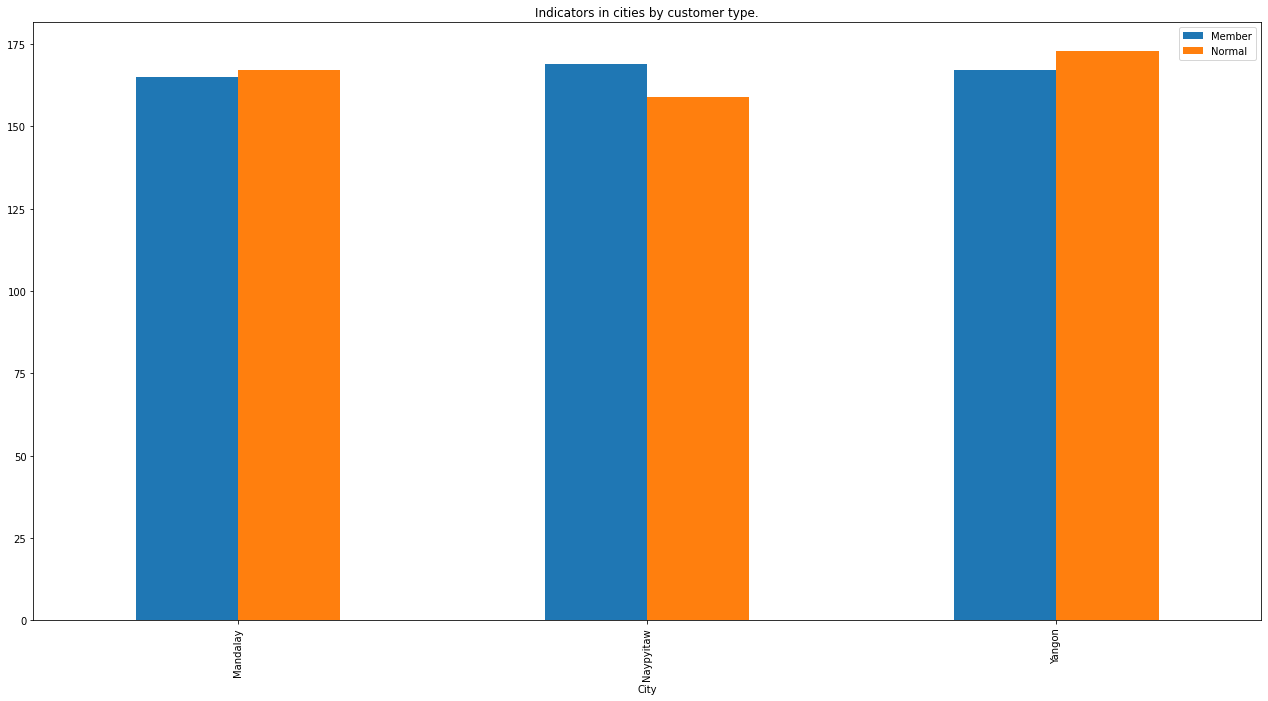

In [25]:
#1
data = df.groupby(['City','Customer type']).count()['Gender']
data.unstack(level=1).plot(kind='bar', figsize=(22,11), title = "Indicators in cities by customer type.")
plt.legend(loc='upper right')

In [26]:
data

City       Customer type
Mandalay   Member           165
           Normal           167
Naypyitaw  Member           169
           Normal           159
Yangon     Member           167
           Normal           173
Name: Gender, dtype: int64

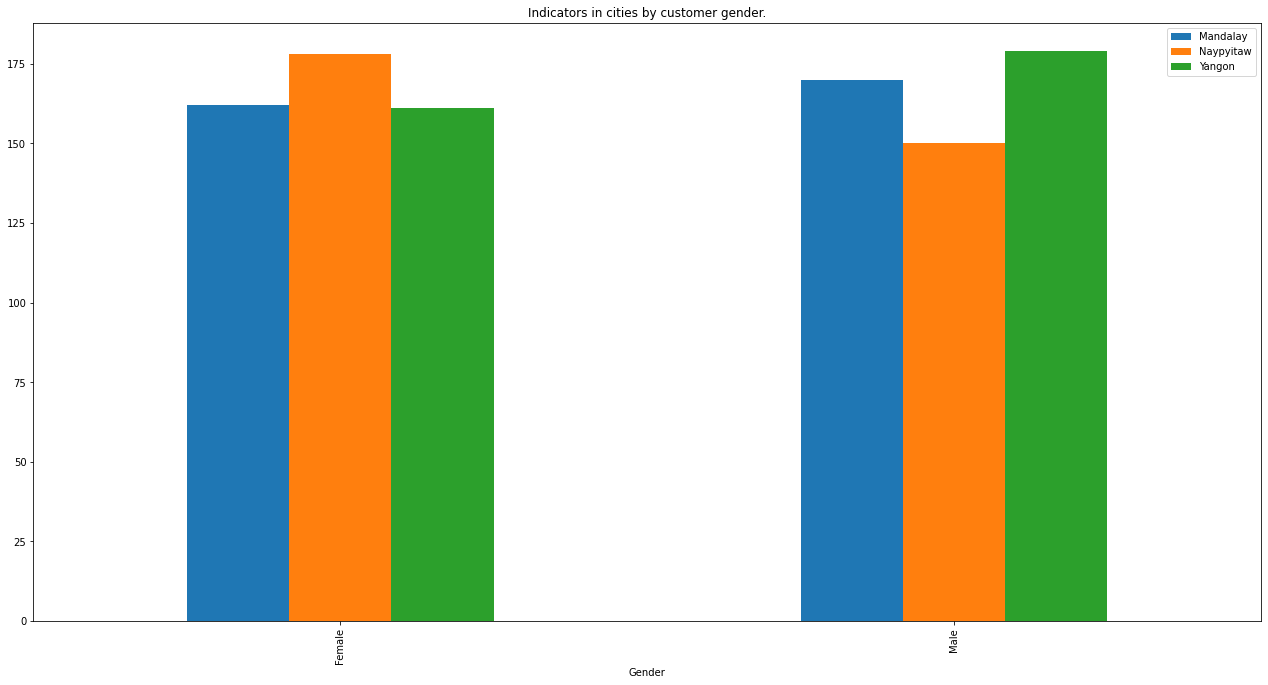

In [27]:
#2
data_gender = df.groupby(['City','Gender']).count()['Customer type']
a = data_gender.unstack(level=0).plot(kind='bar', figsize=(22,11), title="Indicators in cities by customer gender.")
plt.legend(loc='upper right')

In [28]:
data_gender

City       Gender
Mandalay   Female    162
           Male      170
Naypyitaw  Female    178
           Male      150
Yangon     Female    161
           Male      179
Name: Customer type, dtype: int64

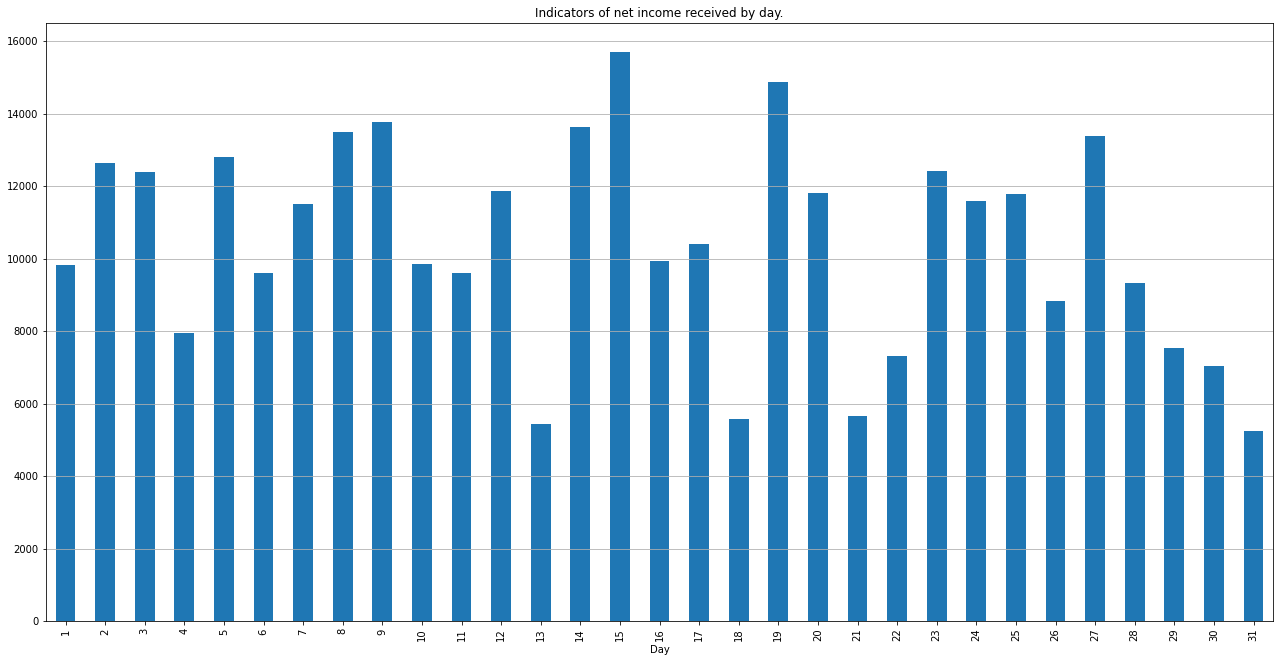

In [29]:
#3
data_total = df.groupby(['Day']).sum()['Total']
b = data_total.plot(kind='bar', figsize=(22,11), title="Indicators of net income received by day.")
plt.grid(axis='y')

In [30]:
data_total

Day
1      9824.0835
2     12646.7565
3     12399.2295
4      7957.6245
5     12798.6915
6      9612.2250
7     11500.7130
8     13503.7770
9     13767.2850
10     9865.2015
11     9618.3675
12    11861.3040
13     5449.0485
14    13635.3420
15    15717.4605
16     9947.3220
17    10418.6145
18     5569.3365
19    14883.2355
20    11820.0705
21     5663.3535
22     7326.2280
23    12428.8185
24    11601.9750
25    11780.5695
26     8828.1900
27    13398.1680
28     9326.1315
29     7539.8085
30     7045.3215
31     5232.4965
Name: Total, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


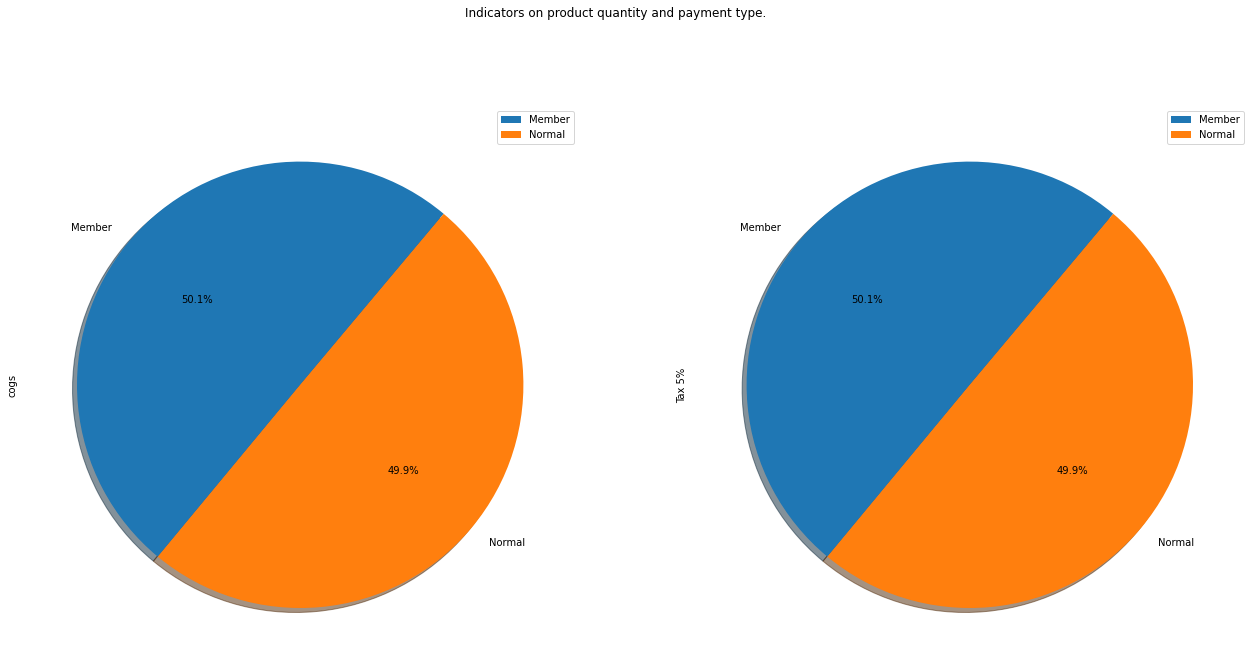

In [46]:
#4
data_product = df.groupby('Customer type')['cogs','Tax 5%'].count()
d = data_product.plot(kind='pie', figsize=(22,11),autopct='%1.1f%%', subplots=True, shadow=True, startangle=50,  title='Indicators on product quantity and payment type.')

In [45]:
data_product 

,Product line,Tax 5%
Customer type,,
Member,501,501
Normal,499,499


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


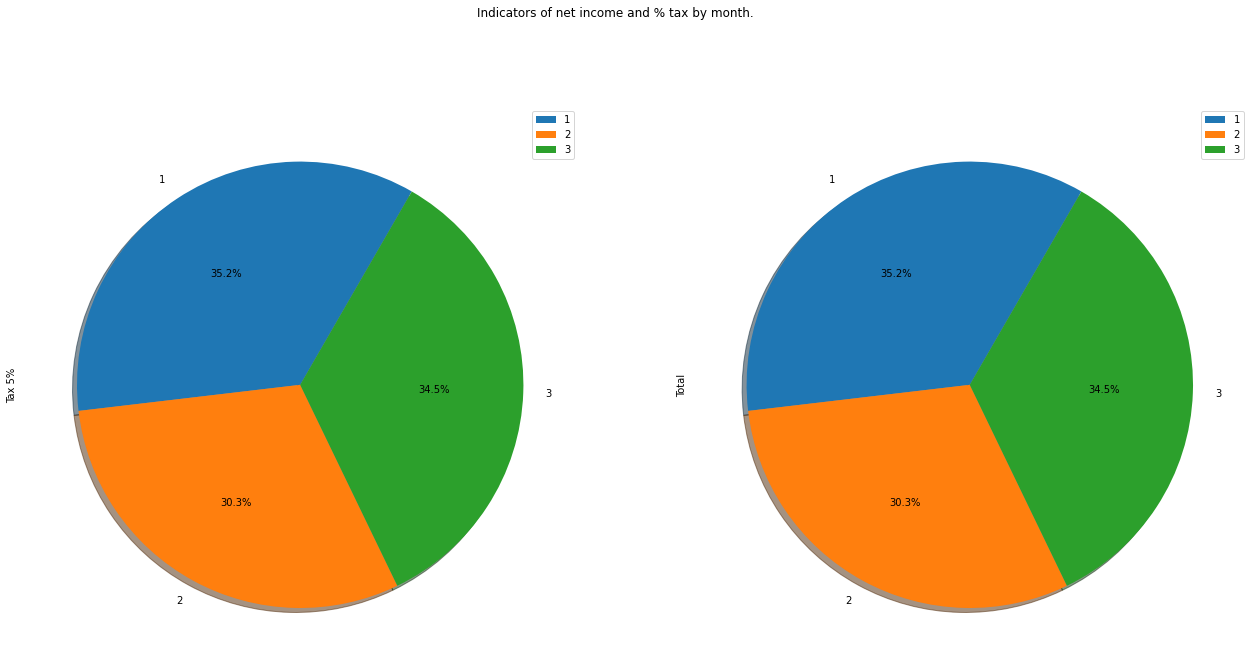

In [32]:
#5
pay = df.groupby('Month')['Tax 5%','Total'].count()
p = pay.plot(kind='pie', figsize=(22,11), autopct='%1.1f%%', subplots=True, shadow=True, startangle=60,  title='Indicators of net income and % tax by month.')

In [47]:
pay

,Tax 5%,Total
Month,,
1,352,352
2,303,303
3,345,345


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


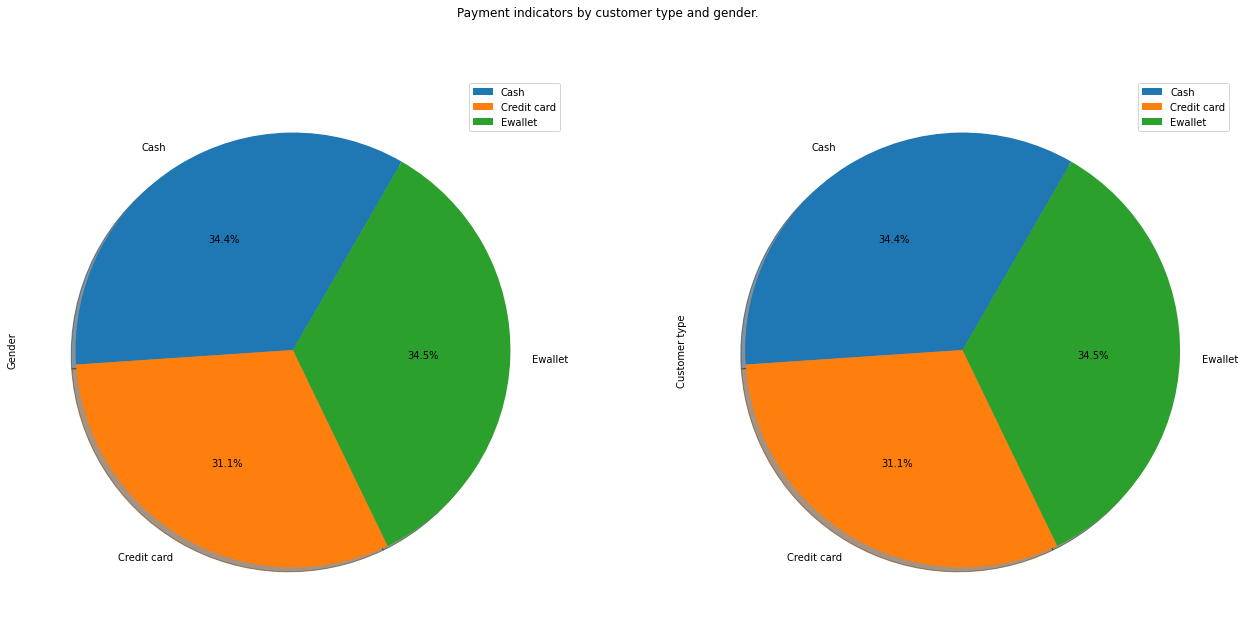

In [33]:
#6
c = df.groupby('Payment')['Gender','Customer type'].count()
city = c.plot(kind='pie', figsize=(22,10), autopct='%1.1f%%', subplots=True, shadow=True, startangle=60,  title='Payment indicators by customer type and gender.')

In [48]:
c

,Gender,Customer type
Payment,,
Cash,344,344
Credit card,311,311
Ewallet,345,345


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


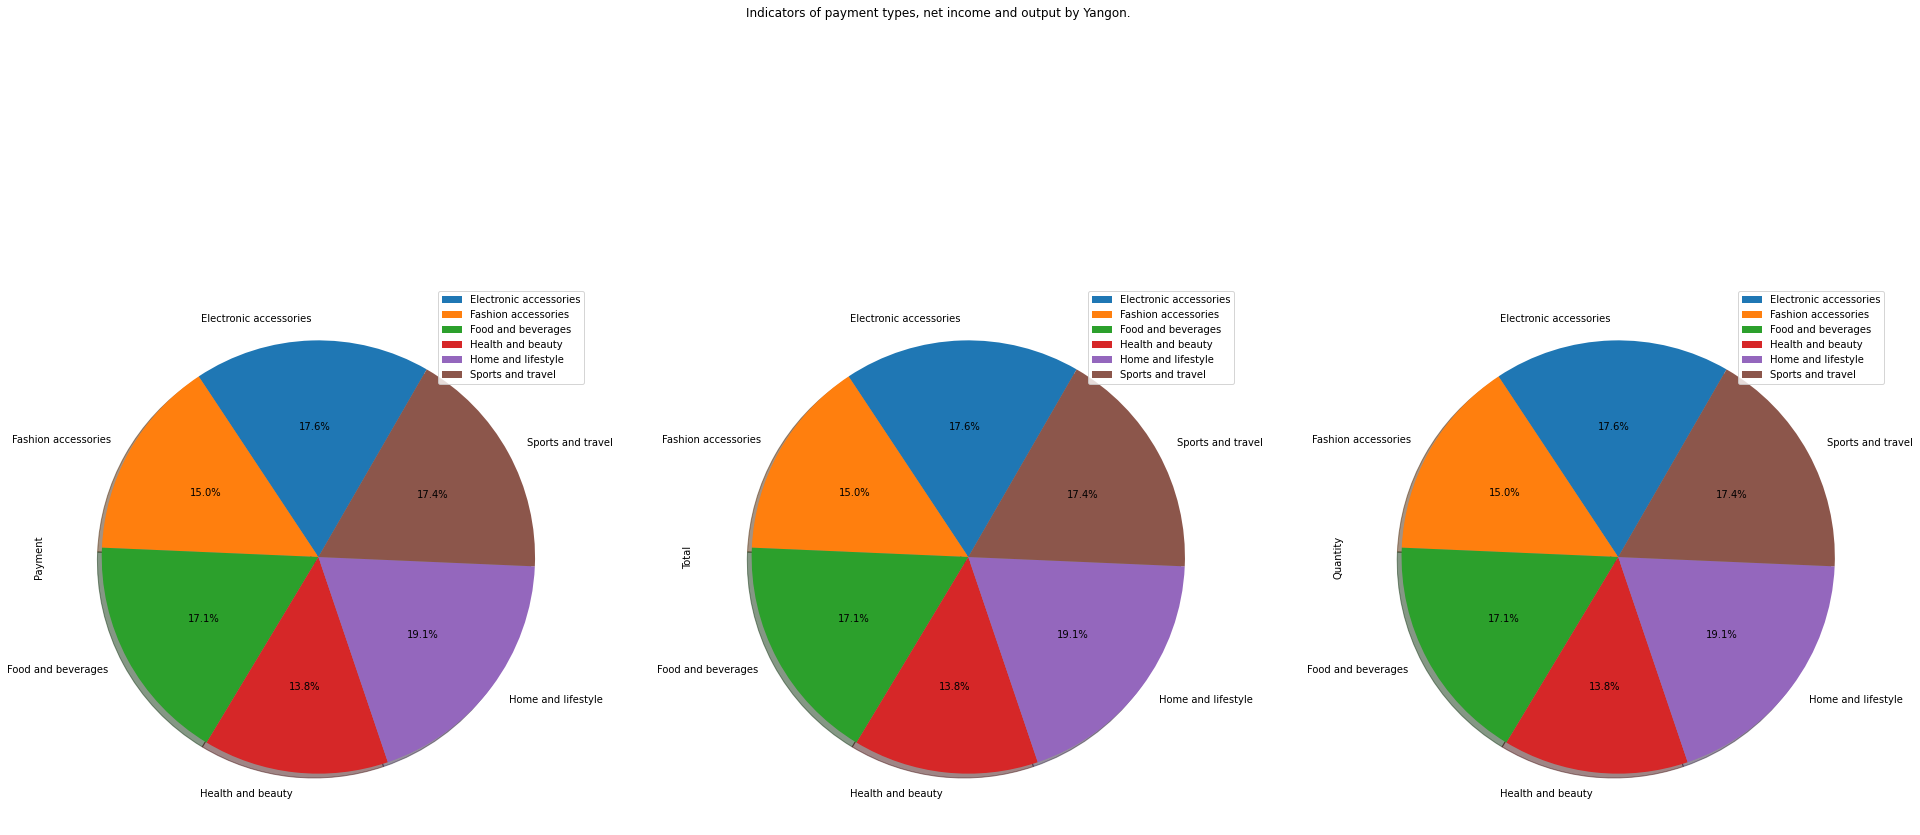

In [34]:
#7
yangon = df.loc[df['City'] == 'Yangon']
data_yangon = yangon.groupby('Product line')['Payment','Total','Quantity'].count()
yangon = data_yangon.plot(kind='pie', figsize=(33,16), autopct='%1.1f%%', subplots=True, shadow=True, startangle=60, title='Indicators of payment types, net income and output by Yangon.')


In [50]:
data_yangon 

,Payment,Total,Quantity
Product line,,,
Electronic accessories,60,60,60
Fashion accessories,51,51,51
Food and beverages,58,58,58
Health and beauty,47,47,47
Home and lifestyle,65,65,65
Sports and travel,59,59,59


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


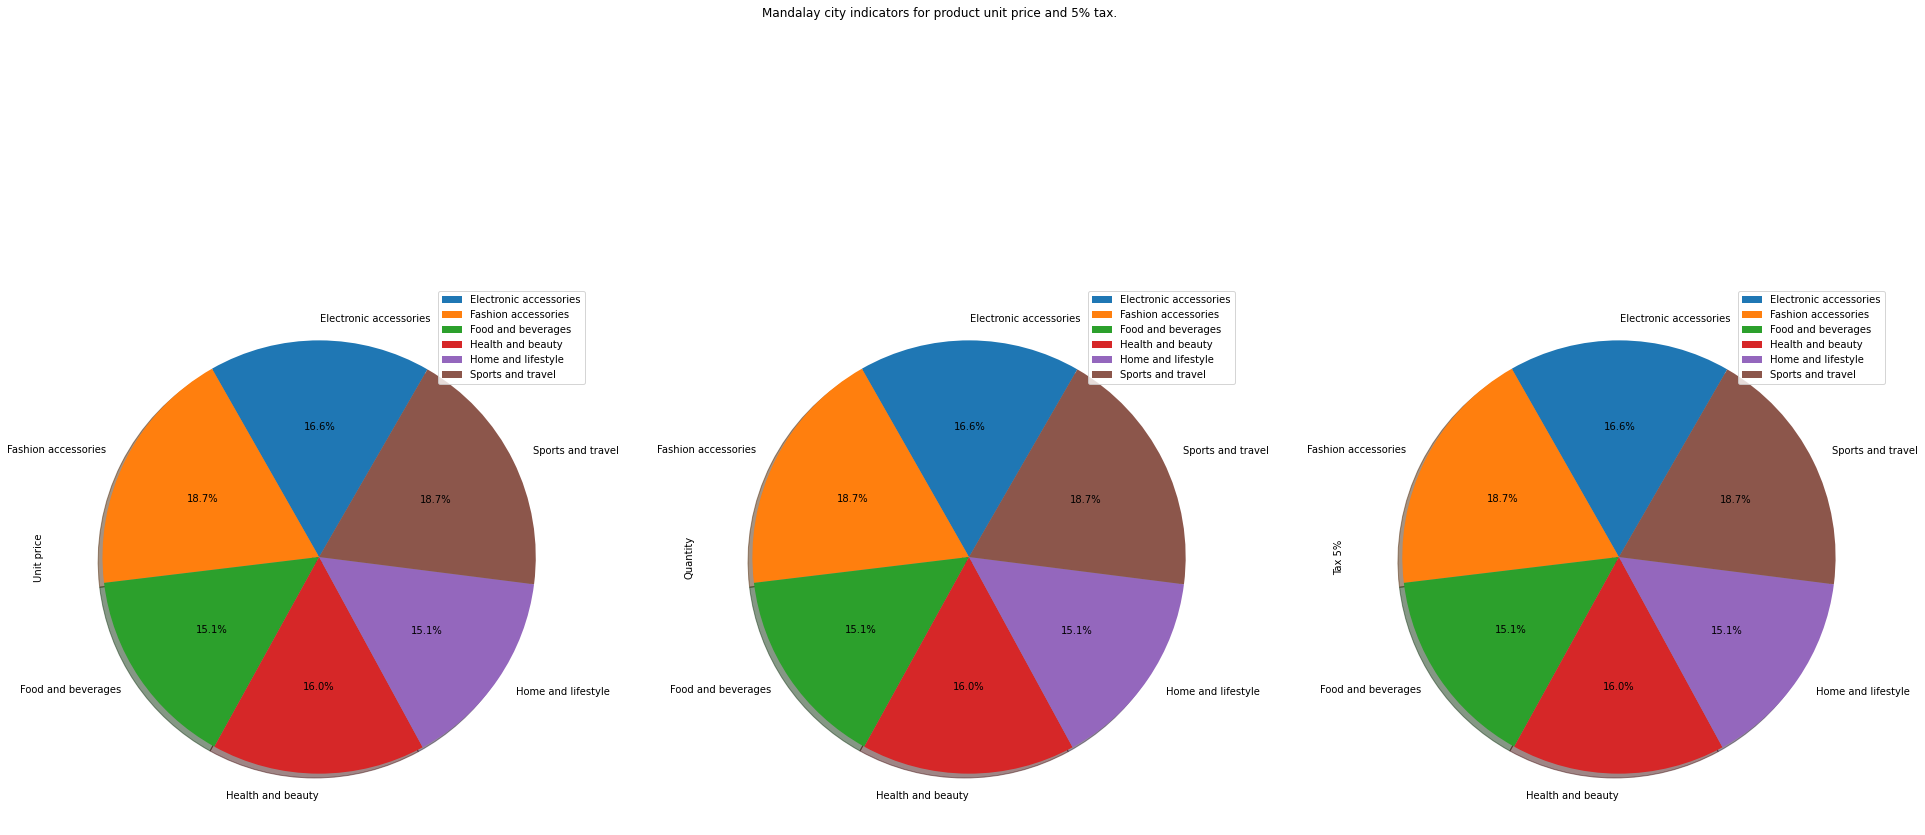

In [35]:
#8
mandalay = df.loc[df['City'] == 'Mandalay']
# data_mandalay = mandalay.groupby(['Product line','Payment']).count()['Quantity'] #(['Product line','Customer type']).count()['Payment']
data_mandalay = mandalay.groupby('Product line')['Unit price','Quantity',"Tax 5%"].count()
mandalay = data_mandalay.plot(kind='pie', figsize=(33,16), autopct='%1.1f%%', subplots=True, shadow=True, startangle=60, title='Mandalay city indicators for product unit price and 5% tax.')


In [51]:
data_mandalay

,Unit price,Quantity,Tax 5%
Product line,,,
Electronic accessories,55,55,55
Fashion accessories,62,62,62
Food and beverages,50,50,50
Health and beauty,53,53,53
Home and lifestyle,50,50,50
Sports and travel,62,62,62


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


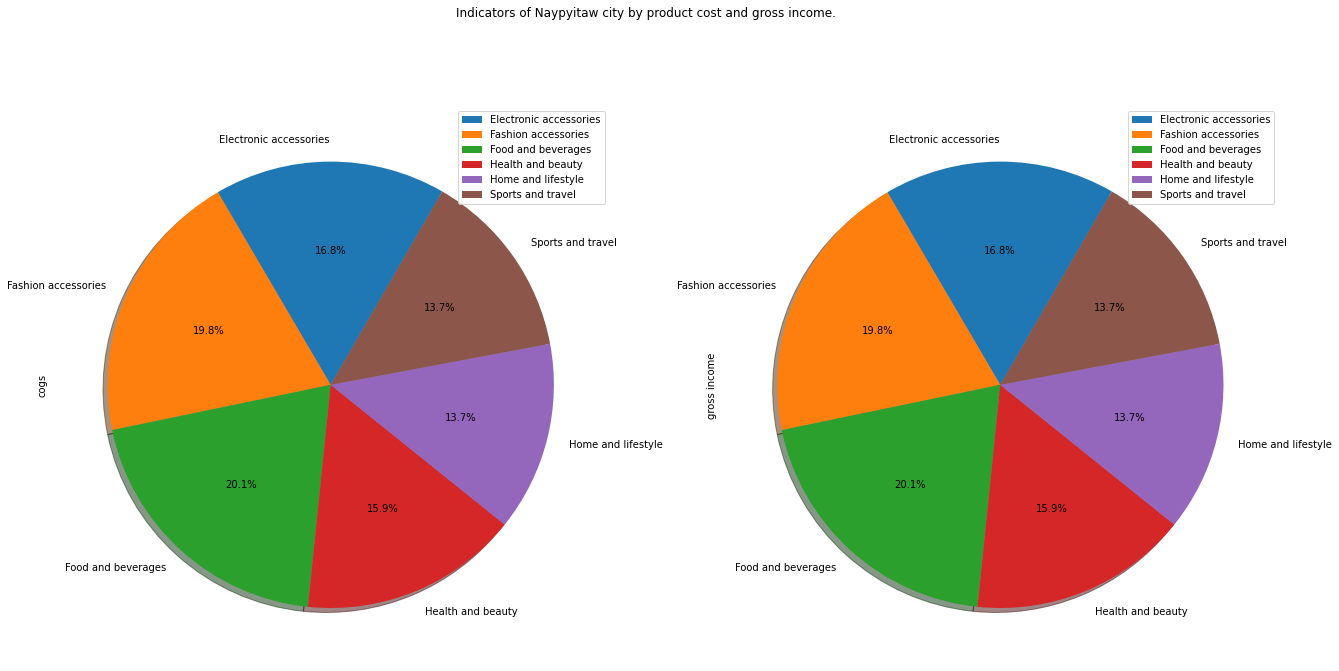

In [36]:
#9
naypyitaw= df.loc[df['City'] == 'Naypyitaw']
# data_naypyitaw = naypyitaw.groupby(['Product line','Payment']).count()['Quantity']
data_naypyitaw = naypyitaw.groupby('Product line')['cogs','gross income'].count()
naypyitaw= data_naypyitaw.plot(kind='pie', figsize=(22,11), autopct='%1.1f%%', subplots=True, shadow=True, startangle=60, title='Indicators of Naypyitaw city by product cost and gross income.')


In [52]:
data_naypyitaw 

,cogs,gross income
Product line,,
Electronic accessories,55,55
Fashion accessories,65,65
Food and beverages,66,66
Health and beauty,52,52
Home and lifestyle,45,45
Sports and travel,45,45
